**Time Series Forecasting using Prophet library - Markov chain Monte Carlo method**

***Author: Sharath S***

Importing Libraries

In [1]:
# import all the necessary libraries
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Importing Data and checking Datatypes


In [2]:
df=pd.read_csv('/content/Call Data.csv') # importing data

In [3]:
df.head() # check the data 

,Date,CallCount
0,3/1/20,254
1,3/2/20,227
2,3/3/20,220
3,3/4/20,220
4,3/5/20,237


In [4]:
df.dtypes # check the datatype of the dataframe

Date         object
CallCount     int64
dtype: object

Data modelling - Prepping the Data in the format needed for the prophet library

In [5]:
#Changing the datatype of the Date from object to Datetime as needed for the forecasting library
df['Date']=pd.DatetimeIndex(df['Date'])
df.dtypes

Date         datetime64[ns]
CallCount             int64
dtype: object

In [6]:
#Renaming the columns that will be fed to the model
df=df.rename(columns={'Date':'ds','CallCount':'y'})
df.head()

,ds,y
0,2020-03-01,254
1,2020-03-02,227
2,2020-03-03,220
3,2020-03-04,220
4,2020-03-05,237


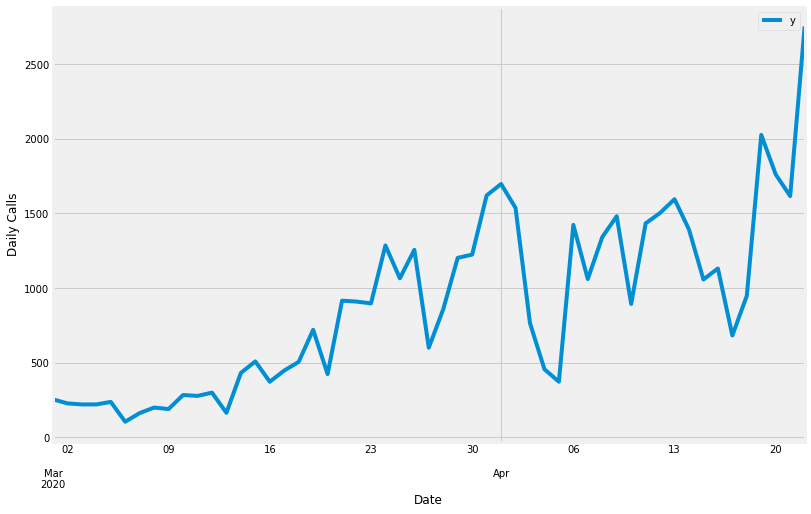

In [7]:
#Plot the data to visualize
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily Calls')
ax.set_xlabel('Date')

plt.show()

**Start the Forecasting**

In [8]:
# Create a new prophet object and set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [9]:
my_model.fit(df) #modelfitting

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Creating a new dataframe where the forecasting value will be stored, since we want the forecast of calls for a period of next 39 days( Till May 2020), and frequency in Days ('D') the arguments represent the same.

In [11]:
future_dates = my_model.make_future_dataframe(periods=39, freq='D')
future_dates.tail()

,ds
87,2020-05-27
88,2020-05-28
89,2020-05-29
90,2020-05-30
91,2020-05-31


In [12]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #Extracting the yhat, uppper and lower bounds

,ds,yhat,yhat_lower,yhat_upper
87,2020-05-27,2951.792006,2359.545775,3567.134199
88,2020-05-28,2897.082949,2307.831328,3471.637844
89,2020-05-29,2464.374293,1820.756071,3062.004984
90,2020-05-30,2688.889122,2141.139104,3291.244842
91,2020-05-31,2925.231892,2341.963349,3490.268743


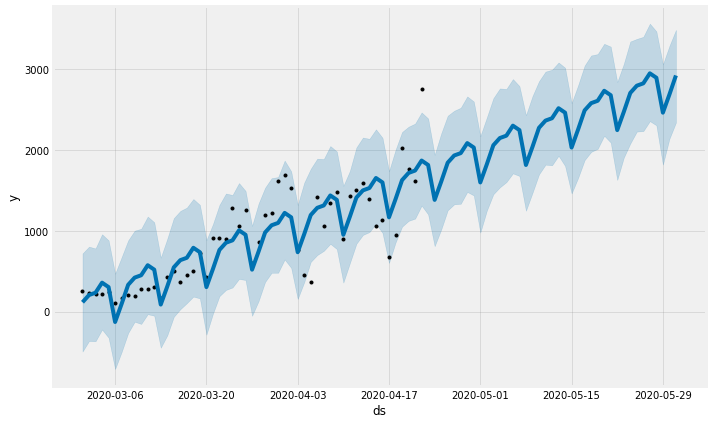

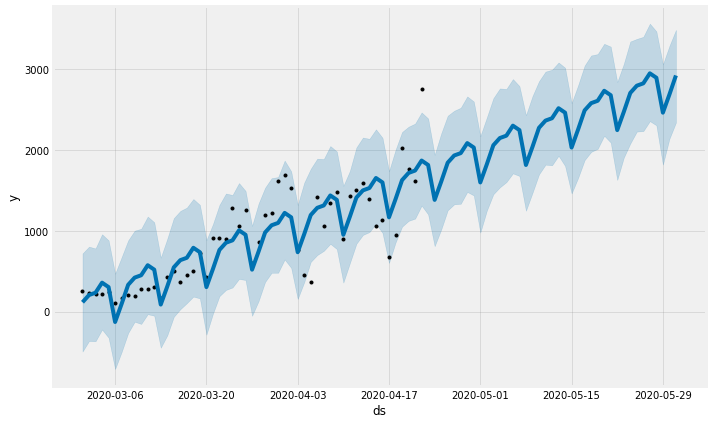

In [21]:
my_model.plot(forecast,uncertainty=True)

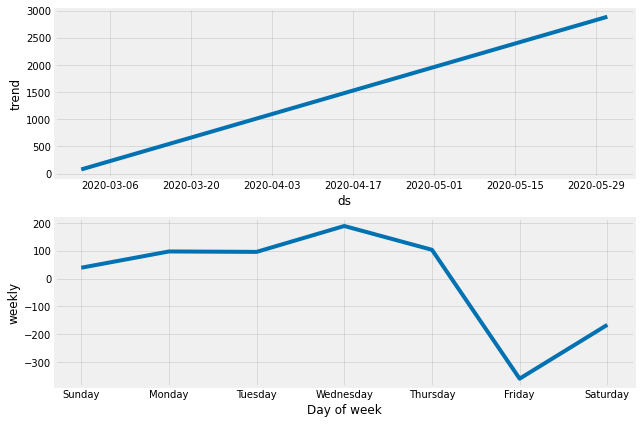

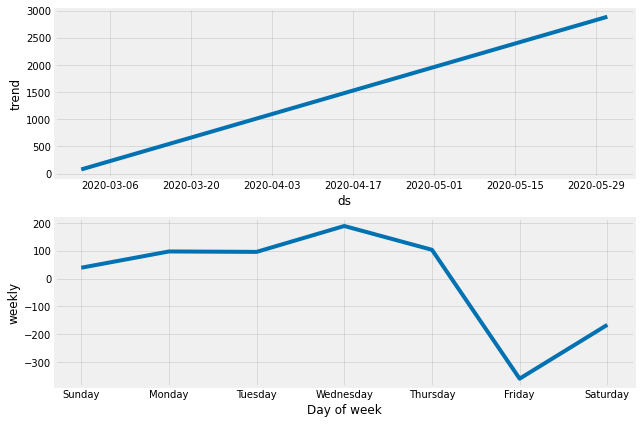

In [14]:
my_model.plot_components(forecast)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,75.980207,-495.565200,720.142507,75.980207,75.980207,39.218712,39.218712,39.218712,39.218712,39.218712,39.218712,0.0,0.0,0.0,115.198920
1,2020-03-02,106.859695,-364.709314,803.947796,106.859695,106.859695,97.700532,97.700532,97.700532,97.700532,97.700532,97.700532,0.0,0.0,0.0,204.560227
2,2020-03-03,137.739182,-367.384262,782.072965,137.739182,137.739182,96.200286,96.200286,96.200286,96.200286,96.200286,96.200286,0.0,0.0,0.0,233.939468
3,2020-03-04,168.618670,-222.359916,957.600041,168.618670,168.618670,189.296754,189.296754,189.296754,189.296754,189.296754,189.296754,0.0,0.0,0.0,357.915424
4,2020-03-05,199.498157,-323.843806,881.725603,199.498157,199.498157,103.708214,103.708214,103.708214,103.708214,103.708214,103.708214,0.0,0.0,0.0,303.206372


In [17]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-03-01,115.198920
1,2020-03-02,204.560227
2,2020-03-03,233.939468
3,2020-03-04,357.915424
4,2020-03-05,303.206372
...,...,...
87,2020-05-27,2951.792006
88,2020-05-28,2897.082949
89,2020-05-29,2464.374293
90,2020-05-30,2688.889122


In [18]:
result=forecast[['ds','yhat']]

In [19]:
result

,ds,yhat
0,2020-03-01,115.198920
1,2020-03-02,204.560227
2,2020-03-03,233.939468
3,2020-03-04,357.915424
4,2020-03-05,303.206372
...,...,...
87,2020-05-27,2951.792006
88,2020-05-28,2897.082949
89,2020-05-29,2464.374293
90,2020-05-30,2688.889122


In [20]:
result.to_csv('/content/result.csv')